In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
X = df[['Pclass', 'Sex', 'Age', 'Fare']].values
y = df['Survived'].values


In [ ]:
X_labeled, X_unlabeled, y_labeled, _ = train_test_split(X, y, test_size=0.7, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_labeled, y_labeled)

LogisticRegression()

In [ ]:
y_pred_orig = model.predict_proba(X_unlabeled)


In [ ]:

noise = np.random.normal(loc=0.0, scale=0.1, size=X_unlabeled.shape)
X_unlabeled_noisy = X_unlabeled + noise

In [ ]:
y_pred_noisy = model.predict_proba(X_unlabeled_noisy)

In [ ]:
consistency_loss = mean_squared_error(y_pred_orig, y_pred_noisy)

# 8. Output
print("Original predictions (first 5):", np.round(y_pred_orig[:5], 2))
print("Noisy predictions (first 5):   ", np.round(y_pred_noisy[:5], 2))
print("Consistency loss (MSE):", consistency_loss)

Original predictions (first 5): [[0.8  0.2 ]
 [0.49 0.51]
 [0.18 0.82]
 [0.05 0.95]
 [0.94 0.06]]
Noisy predictions (first 5):    [[0.83 0.17]
 [0.51 0.49]
 [0.19 0.81]
 [0.05 0.95]
 [0.96 0.04]]
Consistency loss (MSE): 0.002429693894932277


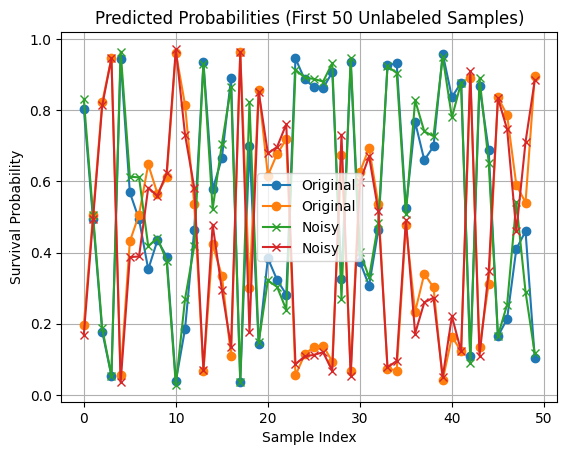

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(y_pred_orig[:50], label="Original", marker='o')
plt.plot(y_pred_noisy[:50], label="Noisy", marker='x')
plt.title("Predicted Probabilities (First 50 Unlabeled Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)
plt.show()


